# ЛАБОРАТОРНАЯ РАБОТА № 4.

Решение оптимизационных задач с помощью генетических алгоритмов.

In [1]:
from random import randint, random, seed, shuffle, choice
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [2]:
seed(1)

## Сгенерируем матрицу инцидентности

In [3]:
def print_matrix(m):
    for row in m:
        print(row)

Функция проверки графа на связность обходом в глубину

In [4]:
def dfs(matrix, u, visited):
    visitedVertices = 1
    visited[u] = True
    for i, w in enumerate(matrix[u]):
        if (w != -1) and (i not in visited):
            rec_visitedVertices, _ = dfs(matrix, i, visited)
            visitedVertices += rec_visitedVertices
    return visitedVertices, visited

Функция генерации матрицы инцидентности

In [5]:
def gen_matrix(n, probability, min_x=1, max_x=50):
    res = [[-1]*n for i in range(n)]
        
    for idy in range(n):
        for idx in range(n):
            if idx < idy and random() < probability:
                val = randint(min_x, max_x)
                res[idy][idx] = val
                res[idx][idy] = val

    for idy in range(n):
        if all([x < 0 for x in res[idy]]):
            idx = randint(0, n-1)
            if idx == idy:
                idx -= 1
            val = randint(min_x, max_x)
            res[idy][idx] = val
            res[idx][idy] = val
           
    # Fixed for not full-connected graph
    s, v = dfs(res, 0, {})
    while s != n:
        v_keys = list(v.keys())
        missed = list(set(range(n)) - set(v_keys))
        idx = choice(v_keys)
        idy = choice(missed)
        val = randint(min_x, max_x)
        res[idy][idx] = val
        res[idx][idy] = val
        s, v = dfs(res, 0, {})
        
    return res

Вспомогательная функция генерации списков цветов для вершин и ребер

In [6]:
def convert_path_to_colors(graph, path, color='red', default='black', n_color=('orange', 'red', '#1f77b4')):
    if not path:
        return None, default
    node_color = [n_color[-1]] * len(graph.nodes)
    for idx, node in enumerate(graph.nodes):
        if node in path:
            if path.index(node) == 0 or path.index(node) == len(path)-1:
                node_color[idx] = n_color[0]
            else:
                node_color[idx] = n_color[1]
    # node_color = [n_color[0] if x in path else n_color[-1] for x in graph.nodes]
    edge_color = [default] * len(graph.edges)
    for idx in range(len(path)):
        for idy, edge in enumerate(graph.edges):
            if idx+1 < len(path) and ((edge[0] == path[idx] and edge[1] == path[idx+1]) or \
                                      (edge[1] == path[idx] and edge[0] == path[idx+1])):
                edge_color[idy] = color
                break
    return node_color, edge_color

Функция отрисовки графа с помощью бибилиотеки networkx

In [7]:
def show_graph_with_labels(adjacency_matrix, path=None, color='red', default='black', seed=0):
    rows, cols = np.where(adjacency_matrix != -1)
    edges = zip(rows.tolist(), cols.tolist())
    gr = nx.Graph()
    gr.add_edges_from(edges)
    node_color, edge_color = convert_path_to_colors(gr, path, color, default)
    pos = nx.spring_layout(gr, scale=2, seed=seed)
    nx.draw(gr, pos, node_size=500, with_labels=True, node_color=node_color, edge_color=edge_color)
    plt.show()

## Проверим работу вспомогательных функций

In [8]:
weight_matrix = [[-1,10,16,-1,-1,-1,-1,10,-1,-1,-1,-1],
                 [10,-1, 4,20,-1,-1,-1,-1, 5,-1,-1,-1],
                 [16, 4,-1,25,-1, 26,-1,-1,-1,-1,-1,-1],
                 [-1,20,25,-1,21,10,28,-1,-1,-1,-1,-1],
                 [-1,-1,-1,21,-1,-1,21,-1,-1,15, 8,13],
                 [-1,-1, 26,10,-1,-1,26,-1,-1,-1,-1,-1],
                 [-1,-1,-1,28,21,26,-1,-1,-1,-1,-1, 4],
                 [10,-1,-1,-1,-1,-1,-1,-1,15,-1,-1,-1],
                 [-1, 5,-1,-1,-1,-1,-1,15,-1, 7, 6,-1],
                 [-1,-1,-1,-1,15,-1,-1,-1, 7,-1,-1,-1],
                 [-1,-1,-1,-1, 8,-1,-1,-1, 6,-1,-1,-1],
                 [-1,-1,-1,-1,13,-1, 4,-1,-1,-1,-1,-1]]

/Users/snipghost/opt/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


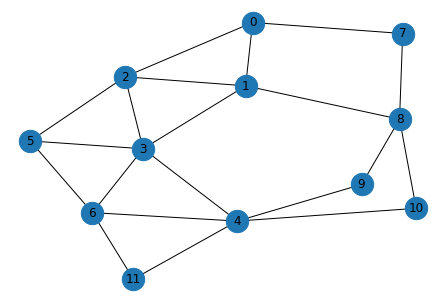

/Users/snipghost/opt/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:585: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  and cb.iterable(edge_color) \


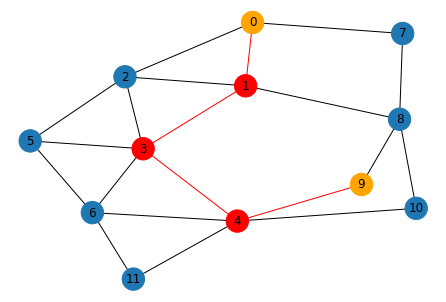

In [9]:
show_graph_with_labels(np.array(weight_matrix))

path = [0, 1, 3, 4, 9]
show_graph_with_labels(np.array(weight_matrix), path=path)

[-1 49  8 -1  2 -1  2 -1 -1 22 -1 -1 -1 -1 -1]
[49 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 33]
[ 8 -1 -1 -1 -1 15 25 -1 -1 -1 -1 43 -1 -1 -1]
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 15 -1 -1]
[ 2 -1 -1 -1 -1 21 -1 -1 -1 -1 16 -1 -1 -1 -1]
[-1 -1 15 -1 21 -1 -1 -1 41 -1 -1 -1 -1 -1 35]
[ 2 -1 25 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
[-1 -1 -1 -1 -1 -1 -1 -1 -1 19 -1 -1 -1 -1 -1]
[-1 -1 -1 -1 -1 41 -1 -1 -1 -1 -1  3 33 -1 -1]
[22 -1 -1 -1 -1 -1 -1 19 -1 -1 -1 -1 -1 50 15]
[-1 -1 -1 -1 16 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
[-1 -1 43 -1 -1 -1 -1 -1  3 -1 -1 -1 -1 -1 -1]
[-1 -1 -1 15 -1 -1 -1 -1 33 -1 -1 -1 -1 24  6]
[-1 -1 -1 -1 -1 -1 -1 -1 -1 50 -1 -1 24 -1 -1]
[-1 33 -1 -1 -1 35 -1 -1 -1 15 -1 -1  6 -1 -1]


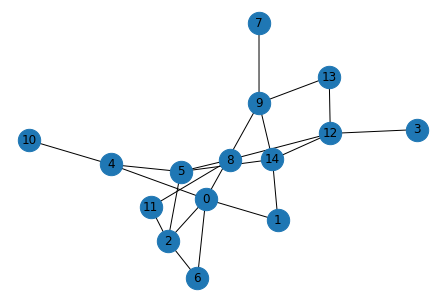

In [10]:
weight_matrix = gen_matrix(15, 0.3)
m = np.array(weight_matrix)
print_matrix(m)
show_graph_with_labels(m)

In [11]:
fromA = 3
toB = 10

## Подготовим алгоритмы для генерации и скрещивания популяций

Генерация случайного пути в графе

In [12]:
def randomWaySearch(weightMatrix, startNode, finishNode):
    randomWay = []
    distance = 0
    currentNode = startNode
    runSearch = True
    while(currentNode != finishNode and runSearch):
        availableWay = list(filter(lambda x: x != -1, weightMatrix[currentNode]))
        randomWay.append(currentNode)

        while(True):
            if (len(availableWay) != 0):
                randomRange = randint(0, len(availableWay) - 1)
                allegedDistance = availableWay[randomRange]
                nextNode = weightMatrix[currentNode].index(availableWay[randomRange])
                if (randomWay.count(nextNode) == 0):
                    currentNode = nextNode
                    distance += allegedDistance
                    break
                else:
                    availableWay.remove(availableWay[randomRange])
            else:
                runSearch = False
                break
    
    if (runSearch == True):
        randomWay.append(currentNode)
    else:
        randomWay.clear()
        
    return tuple(randomWay), distance

Генерация случайной популяции с испольпользованием случайных путей

In [13]:
def randGeneration(weightMatrix, fromA, toB, entity_limit=4, limit=500):
    bad = 0
    good = 0
    it = 0
    generation = []
    
    while len(generation) < entity_limit:
        
        way, distance = randomWaySearch(weightMatrix, fromA, toB)
        if (len(way) == 0):
            bad += 1
        else: 
            generation.append((way, distance))
            good += 1
            
        it += 1
        if it == limit:
            print('Достигнут лимит итераций генерации случайной популяции')
            break
            
    print('Случайная генерация пути для первого поколения:')
    print('Тупиковые:', bad)
    print('Достижимые:', good)

    print('Изначальные пути ({} штук)'.format(len(generation)))
    
    return generation

In [14]:
# Подсчет длины пути
def distanceMeter(weight_matrix, way):
    distance = 0
    lastNode = way[0]
    for node in way:
        if (lastNode != node):
            distance += weight_matrix[lastNode][node]
            lastNode = node
    return distance

# Выдаёт случайную точку скрещивания, если возможно
def pointCrossbreeding(first_way, second_way):
    parts = []
    for i in range(len(first_way) - 2):
        part1 = first_way[i+1]
        for k in range(len(second_way) - 2):
            part2 = second_way[k+1]
            if (part1 == part2):
                parts.append(part1)
    if parts:
        return choice(parts)
    return None

# Делитель по точке
def divider(way, point):
    left = True
    part1 = []
    part2 = []
    for i in way:
        if i == point:
            left = False
        else:
            if left == True:
                part1.append(i)
            else:
                part2.append(i)
    return part1, part2

# Формирователь новых путей
def shaper(_firstWay, _secondWay, point):
    part1_1, part1_2 = divider(_firstWay, point)
    part2_1, part2_2 = divider(_secondWay, point)
    newWay1 = []
    newWay1.extend(part1_1)
    newWay1.append(point)
    newWay1.extend(part2_2)
    if len(newWay1) != len(set(newWay1)):
        newWay1 = []
    newWay2 = []
    newWay2.extend(part2_1)
    newWay2.append(point)
    newWay2.extend(part1_2)
    if len(newWay2) != len(set(newWay2)):
        newWay2 = []
    return tuple(newWay1), tuple(newWay2)

Функция скрещивания двух особей (путей)

In [15]:
def crossbreeding(weightMatrix, first, second, debug=True):
    generation_new = []
    point = pointCrossbreeding(first, second)
    if point:
        new_way_1, new_way_2 = shaper(first, second, point)
        if debug:
            print(first, "и", second, "в точке", point)
        if new_way_1:
            generation_new.append((new_way_1, distanceMeter(weightMatrix, new_way_1)))
        if new_way_2:
            generation_new.append((new_way_2, distanceMeter(weightMatrix, new_way_2)))
    return generation_new

Скрещивание для всей популяции (всех со всеми с вероятностью probability)

In [16]:
def crossbreeding_all(weightMatrix, generation, probability=1, debug=True):
    generation_new = []
    for idx, entity_x in enumerate(generation):
        for idy, entity_y in enumerate(generation):
            if idx != idy and random() < probability:
                generation_new.extend(crossbreeding(weightMatrix, entity_x[0], entity_y[0], debug))
    return generation_new

Мутация одной особи (случайное изменение пути)

In [17]:
def mutate(weightMatrix, entity, debug=True):
    gene = randint(0, len(entity[0])-1)
    value = randint(0, len(entity[0])-1)
    new_way = list(entity[0])
    new_way[gene] = value
    dist = distanceMeter(weightMatrix, new_way)
    if debug:
        print('Мутация:', entity[0], entity[1], '->', new_way, dist)
    return (tuple(new_way), dist)

Случайное применение мутации на всю популяцию с вероятностью probability

In [18]:
def mutate_all(weightMatrix, generation, probability=0.05, debug=True):
    for idx, entity in enumerate(generation):
        if random() < probability:
            generation[idx] = mutate(weightMatrix, entity)
    return generation

## Играем в эволюцию

In [19]:
def print_generation(generation, num):
    print('Поколение {}'.format(num))
    for way, way_len in generation:
        print('Общее расстояние:', way_len, 'Путь:', way)
    print('Минимальное расстояние:', generation[0][1])
    print('-'*80)

In [20]:
def is_matrix_full_connectivity(matrix):
    for idy, row in enumerate(matrix):
        for idx, value in enumerate(row):
            if (value == -1) and (idx != idy):
                return False
            if (idx == idy) and (value != -1):
                return False
    return True

weight_matrix - матрица инцидентности  
from_a, to_b - индекс узла (вершины графа)  
evolutions_limit - ограничение на число итераций  
entity_limit - ограничение на число сущностей после отбора  
remove_duplicates - удалять одинаковые сущности  
apply_selection - применять ограничение на число сущностей  
crossbreeding_probability - вероятность срабатывания скрещивания для двух сущностей  
mutation_probability - вероятность мутации  
debug - вывод отладочной информации  

In [21]:
def run_genetic_model(weight_matrix, from_a, to_b, evolutions_limit=10, entity_limit=10, remove_duplicates=True, 
                      apply_selection=True, crossbreeding_probability=1, mutation_probability=0, debug=True):
    
    if mutation_probability and not is_matrix_full_connectivity(weight_matrix):
        raise ValueError('Incorrect matrix!')

    generation = randGeneration(weight_matrix, from_a, to_b, entity_limit)
    generation = sorted(generation, key=lambda tup: tup[1])

    if debug:
        print_generation(generation, 0)

    for i in range(evolutions_limit):
        print('Скрещивание...')
        generation_new = crossbreeding_all(weight_matrix, generation, crossbreeding_probability, debug)
        print('Новых особей:', len(generation_new))

        generation.extend(generation_new)
        print('Всего особей:', len(generation))

        if remove_duplicates:
            generation = list(set(generation))
            
        if mutation_probability:
            print('Мутации...')
            generation = mutate_all(weight_matrix, generation, mutation_probability, debug)

        generation.sort(key=lambda tup: tup[1])
        
        if apply_selection:
            print('Отбор...')
            generation = generation[:entity_limit]

        print('Особей после отбора:', len(generation))
        print('Лучший путь после отбора: ', generation[0][1])
        
        if debug:
            print_generation(generation, 0)
            
    print('Открытый путь:', generation[0][0], 'длина =', generation[0][1])
    show_graph_with_labels(np.array(weight_matrix), path=generation[0][0])

## Проверяем работу алгоритмов

In [22]:
seed(18)
evolutions_count = 10
entity_limit = 10
crossbreeding_probability = 0.8

Случайная генерация пути для первого поколения:
Тупиковые: 34
Достижимые: 10
Изначальные пути (10 штук)
Поколение 0
Общее расстояние: 97 Путь: (3, 12, 14, 5, 2, 0, 4, 10)
Общее расстояние: 169 Путь: (3, 12, 14, 5, 8, 11, 2, 0, 4, 10)
Общее расстояние: 176 Путь: (3, 12, 13, 9, 14, 5, 4, 10)
Общее расстояние: 179 Путь: (3, 12, 8, 5, 14, 9, 0, 4, 10)
Общее расстояние: 204 Путь: (3, 12, 13, 9, 14, 1, 0, 4, 10)
Общее расстояние: 204 Путь: (3, 12, 13, 9, 14, 1, 0, 4, 10)
Общее расстояние: 243 Путь: (3, 12, 13, 9, 0, 2, 11, 8, 5, 4, 10)
Общее расстояние: 271 Путь: (3, 12, 13, 9, 14, 5, 8, 11, 2, 6, 0, 4, 10)
Общее расстояние: 275 Путь: (3, 12, 8, 11, 2, 6, 0, 1, 14, 5, 4, 10)
Общее расстояние: 275 Путь: (3, 12, 8, 11, 2, 6, 0, 1, 14, 5, 4, 10)
Минимальное расстояние: 97
--------------------------------------------------------------------------------
Скрещивание...
(3, 12, 14, 5, 2, 0, 4, 10) и (3, 12, 14, 5, 8, 11, 2, 0, 4, 10) в точке 14
(3, 12, 14, 5, 2, 0, 4, 10) и (3, 12, 13, 9, 14, 5, 4,

(3, 12, 14, 5, 4, 10) и (3, 12, 14, 5, 2, 6, 0, 4, 10) в точке 14
(3, 12, 14, 5, 4, 10) и (3, 12, 8, 11, 2, 0, 4, 10) в точке 4
(3, 12, 14, 5, 4, 10) и (3, 12, 14, 1, 0, 4, 10) в точке 12
(3, 12, 14, 5, 4, 10) и (3, 12, 8, 5, 4, 10) в точке 5
(3, 12, 14, 5, 4, 10) и (3, 12, 8, 5, 2, 0, 4, 10) в точке 5
(3, 12, 14, 5, 4, 10) и (3, 12, 8, 11, 2, 6, 0, 4, 10) в точке 4
(3, 12, 14, 5, 4, 10) и (3, 12, 8, 5, 2, 6, 0, 4, 10) в точке 5
(3, 12, 14, 5, 2, 0, 4, 10) и (3, 12, 14, 9, 0, 4, 10) в точке 4
(3, 12, 14, 5, 2, 0, 4, 10) и (3, 12, 14, 5, 4, 10) в точке 12
(3, 12, 14, 5, 2, 0, 4, 10) и (3, 12, 14, 1, 0, 4, 10) в точке 14
(3, 12, 14, 5, 2, 0, 4, 10) и (3, 12, 8, 5, 4, 10) в точке 12
(3, 12, 14, 5, 2, 0, 4, 10) и (3, 12, 8, 5, 2, 0, 4, 10) в точке 4
(3, 12, 14, 5, 2, 0, 4, 10) и (3, 12, 8, 5, 2, 6, 0, 4, 10) в точке 12
(3, 12, 14, 5, 2, 6, 0, 4, 10) и (3, 12, 14, 5, 4, 10) в точке 14
(3, 12, 14, 5, 2, 6, 0, 4, 10) и (3, 12, 14, 5, 2, 0, 4, 10) в точке 4
(3, 12, 14, 5, 2, 6, 0, 4, 10) и (3,

(3, 12, 14, 9, 0, 4, 10) и (3, 12, 14, 5, 2, 6, 0, 4, 10) в точке 12
(3, 12, 14, 9, 0, 4, 10) и (3, 12, 8, 11, 2, 0, 4, 10) в точке 12
(3, 12, 14, 9, 0, 4, 10) и (3, 12, 14, 1, 0, 4, 10) в точке 14
(3, 12, 14, 9, 0, 4, 10) и (3, 12, 8, 5, 4, 10) в точке 12
(3, 12, 14, 9, 0, 4, 10) и (3, 12, 8, 5, 2, 0, 4, 10) в точке 4
(3, 12, 14, 5, 4, 10) и (3, 12, 14, 9, 0, 4, 10) в точке 14
(3, 12, 14, 5, 4, 10) и (3, 12, 14, 5, 2, 0, 4, 10) в точке 12
(3, 12, 14, 5, 4, 10) и (3, 12, 14, 5, 2, 6, 0, 4, 10) в точке 5
(3, 12, 14, 5, 4, 10) и (3, 12, 8, 11, 2, 0, 4, 10) в точке 12
(3, 12, 14, 5, 4, 10) и (3, 12, 14, 1, 0, 4, 10) в точке 12
(3, 12, 14, 5, 4, 10) и (3, 12, 8, 5, 4, 10) в точке 12
(3, 12, 14, 5, 4, 10) и (3, 12, 8, 5, 2, 0, 4, 10) в точке 5
(3, 12, 14, 5, 4, 10) и (3, 12, 8, 11, 2, 6, 0, 4, 10) в точке 4
(3, 12, 14, 5, 4, 10) и (3, 12, 8, 5, 2, 6, 0, 4, 10) в точке 12
(3, 12, 14, 5, 2, 0, 4, 10) и (3, 12, 14, 5, 4, 10) в точке 12
(3, 12, 14, 5, 2, 0, 4, 10) и (3, 12, 14, 1, 0, 4, 10) в т

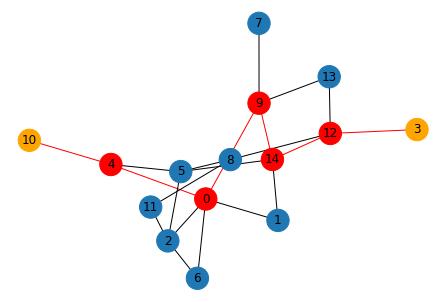

In [23]:
run_genetic_model(weight_matrix, fromA, toB, evolutions_count, entity_limit, crossbreeding_probability)

In [24]:
weight_matrix[3][12] + weight_matrix[12][14] + weight_matrix[14][9] + \
weight_matrix[9][0] + weight_matrix[0][4] + weight_matrix[4][10]

76

## Проверка алгоритмом Дейкстры

In [25]:
class Graph(): 
  
    def __init__(self, vertices, maxint=999999): 
        self.V = vertices 
        self.graph = [[0 for column in range(vertices)] for row in range(vertices)] 
        self.maxint = maxint
  
    def printSolution(self, dist): 
        print("Vertex \tDistance from Source")
        for node in range(self.V): 
            print(node, "\t", dist[node])
  
    def minDistance(self, dist, sptSet): 
        min = self.maxint 
        for v in range(self.V): 
            if dist[v] < min and sptSet[v] == False: 
                min = dist[v] 
                min_index = v 
        return min_index 

    def dijkstra(self, src, goal=None): 
        dist = [self.maxint] * self.V 
        dist[src] = 0
        sptSet = [False] * self.V 
        for cout in range(self.V): 
            u = self.minDistance(dist, sptSet) 
            sptSet[u] = True
            for v in range(self.V): 
                if self.graph[u][v] > 0 and sptSet[v] == False and dist[v] > dist[u] + self.graph[u][v]: 
                        dist[v] = dist[u] + self.graph[u][v] 
        if not goal:
            self.printSolution(dist) 
        else:
            return dist[goal]

In [26]:
g = Graph(len(weight_matrix))
g.graph = weight_matrix

dist = g.dijkstra(fromA, toB)

print('From:\t', fromA, '\nTo:\t', toB, '\nDist:\t', dist)

From:	 3 
To:	 10 
Dist:	 76


## Аналогично для полносвязного графа (с мутациями)

[-1  9 34 50 14 47 17 29 16 13 47 31 22  8 28]
[ 9 -1 24  7 28  2 17  1 16 33  3 30 36 28 38]
[34 24 -1 15  5  4 44 46 36 14  3 30 26 32 50]
[50  7 15 -1 23 47 14 22  2  3 12 47  8 35 23]
[14 28  5 23 -1 42 39 46 25  8 20 40 37 14 36]
[47  2  4 47 42 -1 17 22 31 39 19 11 43  3 18]
[17 17 44 14 39 17 -1  7 29 11 33 14 13 30 45]
[29  1 46 22 46 22  7 -1 19 29 30 15 47 46 10]
[16 16 36  2 25 31 29 19 -1  5 32 11 46 40 33]
[13 33 14  3  8 39 11 29  5 -1 38 13  6 27 24]
[47  3  3 12 20 19 33 30 32 38 -1 26 50  6 11]
[31 30 30 47 40 11 14 15 11 13 26 -1 30 33 23]
[22 36 26  8 37 43 13 47 46  6 50 30 -1 25 39]
[ 8 28 32 35 14  3 30 46 40 27  6 33 25 -1 20]
[28 38 50 23 36 18 45 10 33 24 11 23 39 20 -1]


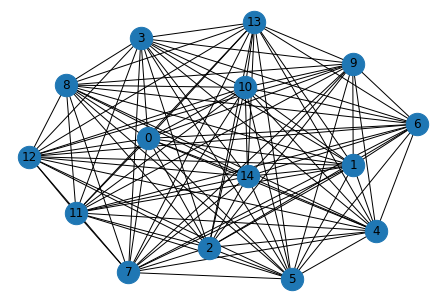

In [27]:
weight_matrix_full = gen_matrix(15, 1)
m_full = np.array(weight_matrix_full)
print_matrix(m_full)
show_graph_with_labels(m_full)

In [28]:
fromA = 3
toB = 5

Случайная генерация пути для первого поколения:
Тупиковые: 0
Достижимые: 10
Изначальные пути (10 штук)
Скрещивание...
Новых особей: 75
Всего особей: 85
Мутации...
Мутация: (3, 6, 13, 2, 7, 8, 9, 14, 4, 1, 5) 236 -> [3, 6, 13, 2, 7, 8, 9, 6, 4, 1, 5] 226
Мутация: (3, 9, 5) 42 -> [3, 9, 1] 36
Мутация: (3, 1, 5) 9 -> [2, 1, 5] 26
Мутация: (3, 1, 12, 4, 14, 13, 11, 6, 9, 7, 2, 0, 8, 5) 350 -> [3, 1, 12, 4, 14, 13, 11, 6, 9, 7, 2, 7, 8, 5] 365
Мутация: (3, 7, 8, 9, 14, 4, 1, 5) 136 -> [3, 7, 8, 9, 2, 4, 1, 5] 95
Мутация: (3, 12, 13, 11, 5) 77 -> [3, 12, 13, 3, 5] 115
Мутация: (3, 9, 7, 2, 0, 8, 5) 159 -> [3, 9, 7, 2, 0, 8, 6] 157
Отбор...
Особей после отбора: 10
Лучший путь после отбора:  26
Скрещивание...
Новых особей: 82
Всего особей: 92
Мутации...
Отбор...
Особей после отбора: 10
Лучший путь после отбора:  9
Скрещивание...
Новых особей: 80
Всего особей: 90
Мутации...
Мутация: (3, 9, 2, 4, 1, 0, 14, 5) 105 -> [3, 9, 2, 4, 1, 0, 14, 7] 97
Отбор...
Особей после отбора: 10
Лучший путь после 

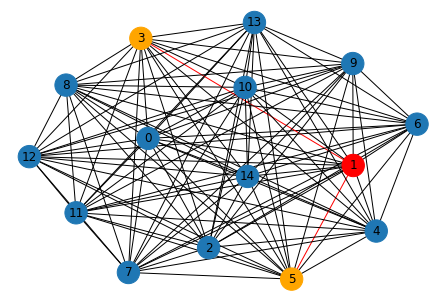

In [29]:
run_genetic_model(weight_matrix_full, fromA, toB, evolutions_count, entity_limit, crossbreeding_probability, mutation_probability=0.05, debug=False)

In [30]:
g = Graph(len(weight_matrix_full))
g.graph = weight_matrix_full

dist = g.dijkstra(fromA, toB)

print('From:\t', fromA, '\nTo:\t', toB, '\nDist:\t', dist)

From:	 3 
To:	 5 
Dist:	 9


## Случай большего числа узлов

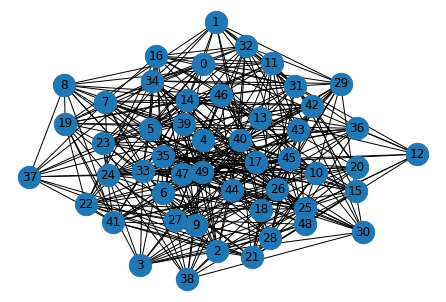

In [31]:
weight_matrix_big = gen_matrix(50, 0.3)
m_big = np.array(weight_matrix_big)
show_graph_with_labels(m_big)

In [32]:
fromA = 1
toB = 3

Случайная генерация пути для первого поколения:
Тупиковые: 0
Достижимые: 10
Изначальные пути (10 штук)
Скрещивание...
Новых особей: 86
Всего особей: 96
Отбор...
Особей после отбора: 10
Лучший путь после отбора:  19
Скрещивание...
Новых особей: 104
Всего особей: 114
Отбор...
Особей после отбора: 10
Лучший путь после отбора:  19
Скрещивание...
Новых особей: 104
Всего особей: 114
Отбор...
Особей после отбора: 10
Лучший путь после отбора:  19
Скрещивание...
Новых особей: 104
Всего особей: 114
Отбор...
Особей после отбора: 10
Лучший путь после отбора:  19
Скрещивание...
Новых особей: 104
Всего особей: 114
Отбор...
Особей после отбора: 10
Лучший путь после отбора:  19
Скрещивание...
Новых особей: 104
Всего особей: 114
Отбор...
Особей после отбора: 10
Лучший путь после отбора:  19
Скрещивание...
Новых особей: 104
Всего особей: 114
Отбор...
Особей после отбора: 10
Лучший путь после отбора:  19
Скрещивание...
Новых особей: 104
Всего особей: 114
Отбор...
Особей после отбора: 10
Лучший путь после

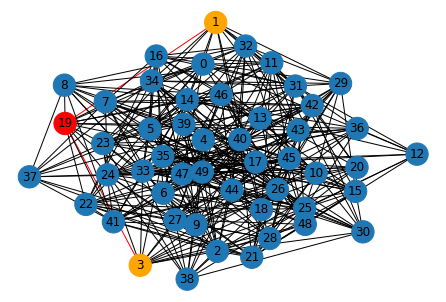

In [33]:
run_genetic_model(weight_matrix_big, fromA, toB, evolutions_count, entity_limit, crossbreeding_probability, debug=False)

In [34]:
g = Graph(len(weight_matrix_big))
g.graph = weight_matrix_big

dist = g.dijkstra(fromA, toB)

print('From:\t', fromA, '\nTo:\t', toB, '\nDist:\t', dist)

From:	 1 
To:	 3 
Dist:	 19
